# Worksheet 7 
Name: Sabarno Saha
Roll: 22MS037

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from comphy import *

In [60]:
def rk4(y,x,k,h,f):
    '''
    Parameters
    ----------
    y : float
        initial value at (n-1) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation using the Runge-Kutta 4 method
    
    Returns
    ---------
    returns the value of y at the next time step using the Runge-Kutta 4 method
    
    '''
 
    k1 = h*f(x,y,k)
    k2 = h*f(x+h/2,y+k1/2,k)
    k3 = h*f(x+h/2,y+k2/2,k)
    k4 = h*f(x+h,y+k3,k)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n
def call(meth,a,b,k,N,y0,f): # call function Discretizes and generates method
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        'euler' for Euler method
        'midpoint' for Midpoint method
        'rk4' for Runge-Kutta 4 method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified.
        
    '''
#     print(k)
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],k,h,f)
    return xs, ys
def bisection(a,b,f,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c)"))
    count = 0
    if abs(f(a))<=tol:
        return a
    elif abs(f(b))<=tol:
        return b
    if f(a)*f(b)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a)
        fb = f(b)
        fc = f(c)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c


In [63]:

def pot(x):
    if abs(x)>Lo:
        return 0
    elif abs(x)<=Lo:
        v = -Vo * (Lo - x**3) / 2
        return v
def odef(x,y,E):
#     print(x)
#     print(E)
    k2 = E - pot(x)
#     print(k2)
    return np.array([y[1], -k2 * y[0]])

def score(E,f,ybound):
    yi1 = np.asarray([ybound[0], 1.0e-2])
    xs1, ys1 = call(rk4, a, b, E, N, yi1, f)
    a1 = abs(xs1 + Lo)
    yi2 = np.asarray([ybound[1], 1.0e-2])
    xs2, ys2 = call(rk4, b, a, E, N, yi2, f)
    a2 = abs(xs2 + Lo)

    n1 = np.where(a1 == np.min(a1))[0][0]
    n2 = np.where(a2 == np.min(a2))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]

In [64]:
Vo = 40.
Lo = 1.
a = -3.
b = 3.
N = 129
ybound = np.asarray([0.0, 0.0])
Es = np.linspace(-Vo, 0, 1000);
scores = [score(i, odef,ybound) for i in Es]

Text(0, 0.5, 'Score')

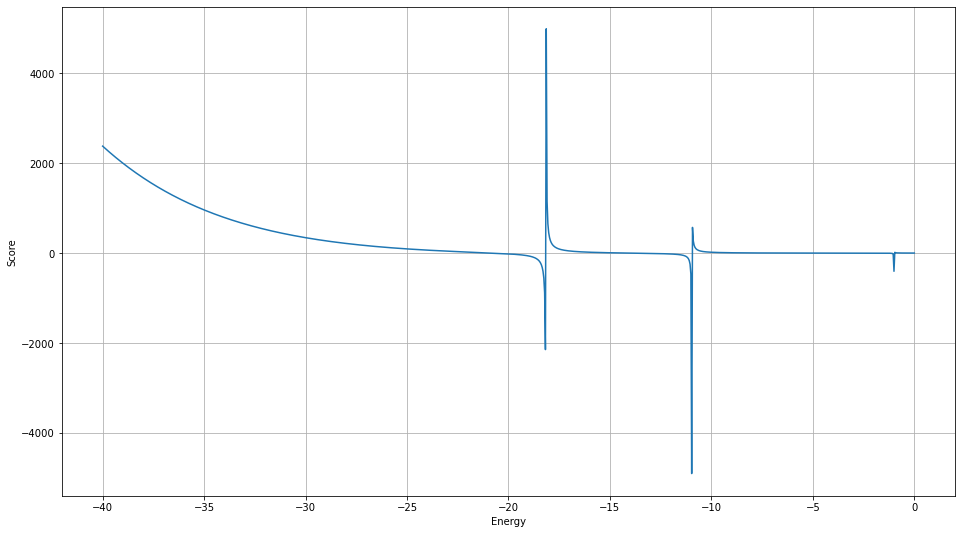

In [68]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores)
plt.grid()
plt.xlabel("Energy")
plt.ylabel("Score")

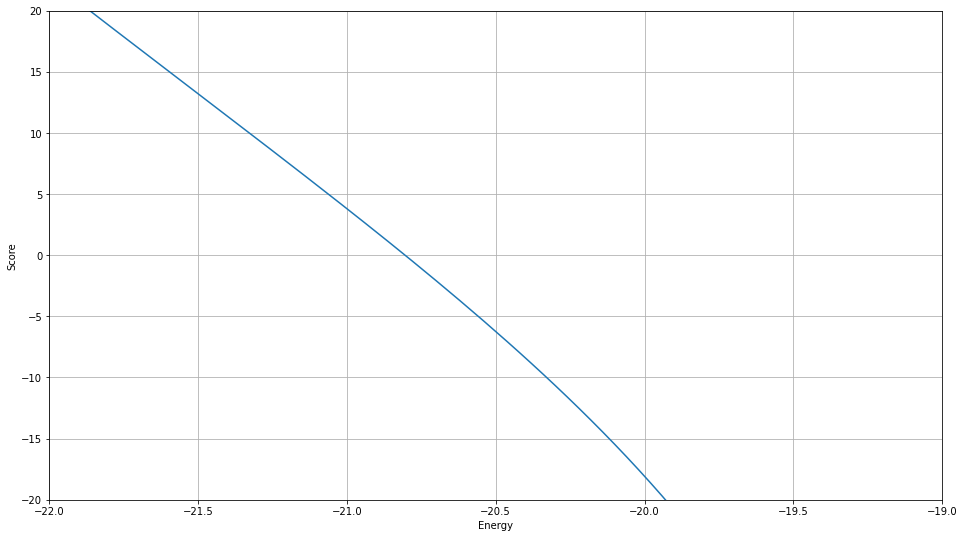

In [70]:
plt.figure(figsize=(16,9))
plt.plot(Es,scores);
plt.xlim([-22,-19])
plt.ylim([-20,20])
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

In [76]:
Eini=np.array([-14.0,-13.0])
maxiter = 50
iter,Eeigen = bisection(*Eini,score,ybound, maxiter)

TypeError: score() missing 2 required positional arguments: 'f' and 'ybound'